In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../Datasets/NYC311data.csv")

C:\Users\92100170006\AppData\Local\Temp\ipykernel_6532\2389003270.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Datasets/NYC311data.csv")


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
# Select necessary columns 
df = df[["Unique Key","Created Date","Closed Date","Complaint Type","Location Type","Incident Zip","City","Status","Due Date","Resolution Description","Resolution Action Updated Date","Latitude","Longitude"]]
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,Street/Sidewalk,11105.0,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,Street/Sidewalk,10458.0,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Street/Sidewalk,10461.0,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Street/Sidewalk,11373.0,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,40.733060,-73.874170


In [6]:
status_df = df.Status.value_counts()
status_df

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Status Analysis'}, xlabel='Status', ylabel='Status'>

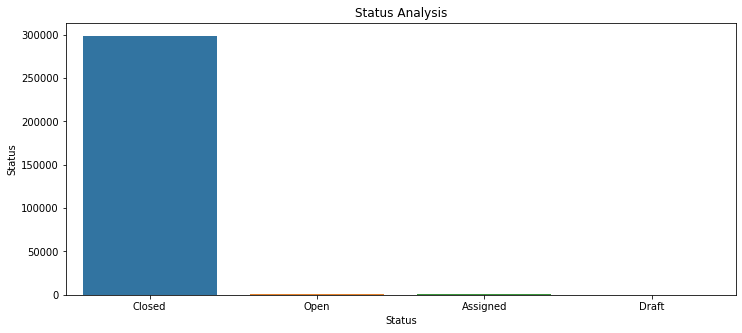

In [7]:
plt.figure(figsize=(12,5))
plt.title("Status Analysis")
plt.xlabel("Status")
plt.ylabel("Count")
sns.barplot(x= status_df.index, y=status_df)

### Complaints Types Based on category

In [8]:
complaints_type_df = df["Complaint Type"].value_counts()
complaints_type_df

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaints Types Distribution'}, xlabel='Complaint Type', ylabel='Complaint Types'>

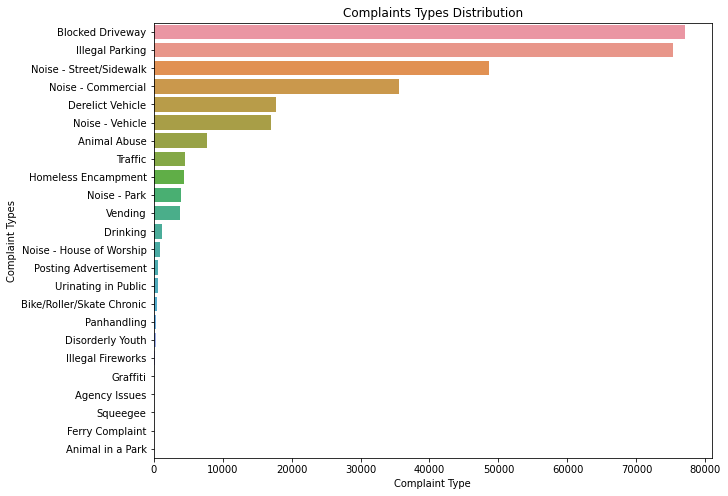

In [9]:
plt.figure(figsize=(10,8))
plt.title("Complaints Types Distribution")
plt.xlabel("Count")
plt.ylabel("Complaint Types")
sns.barplot(x = complaints_type_df, y = complaints_type_df.index)

### Analysis based on City

In [10]:
city_df = df.City.value_counts()
city_df

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Cities')]

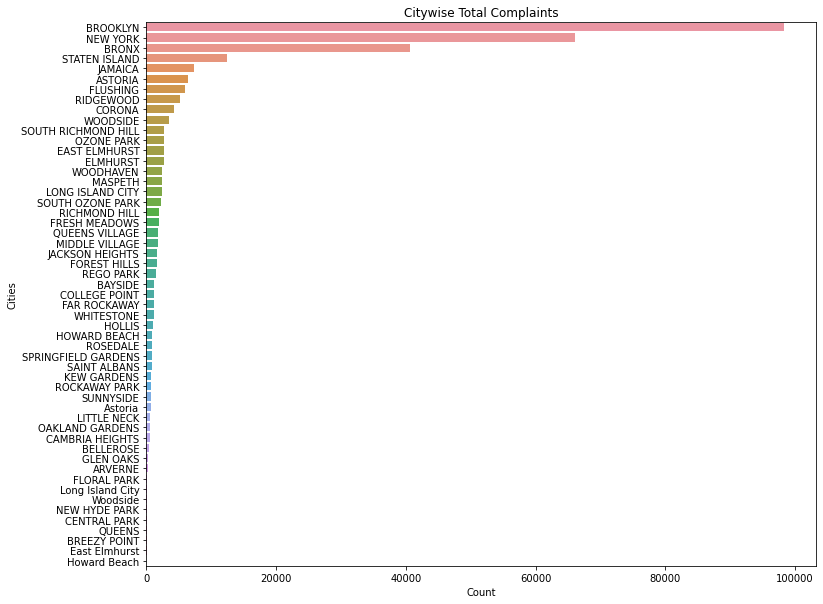

In [11]:
plt.figure(figsize=(12,10))
plt.title("Citywise Total Complaints")
city_df_plot = sns.barplot(y=city_df.index, x=city_df)
city_df_plot.set(xlabel="Count", ylabel="Cities")

In [12]:
top_5_city_group = df["City"].value_counts().head(5)
top_5_city_group

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [13]:
df_complaint_type_per_city = df[df.City.isin(top_5_city_group.index)]

In [14]:
df_temp = pd.crosstab( df_complaint_type_per_city["Complaint Type"],df_complaint_type_per_city["City"])
df_temp

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,1415,2394,229,1525,557
Bike/Roller/Skate Chronic,20,111,2,225,7
Blocked Driveway,12755,28148,2818,2072,2142
Derelict Vehicle,1953,5181,954,537,1766
Disorderly Youth,63,72,8,69,23
Drinking,188,257,34,295,175
Graffiti,9,43,3,22,2
Homeless Encampment,247,857,79,2775,71
Illegal Fireworks,24,61,4,36,10


<AxesSubplot:title={'center':'Categorywise Complaints per city'}, xlabel='City', ylabel='Complaint Type'>

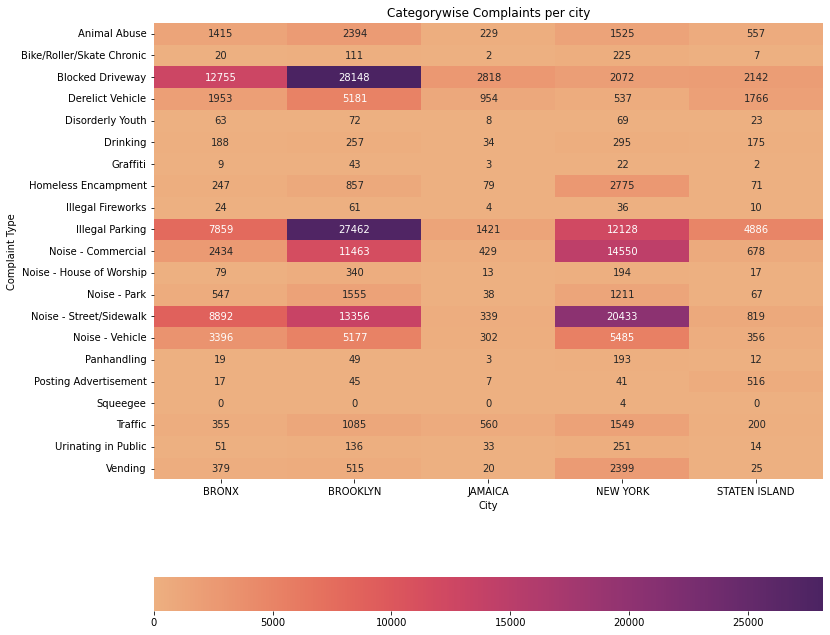

In [15]:
plt.figure(figsize=(12,12))
plt.title("Categorywise Complaints per city")
plt.xlabel("Cities")
plt.ylabel("Complaint Types")
sns.heatmap(df_temp,annot=True, cmap='flare', fmt='d', cbar_kws={'orientation':'horizontal'})